In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
# Make the request
url = "http://data.phl.opendata.arcgis.com/datasets/0960ea0f38f44146bb562f2b212075aa_0.geojson"
planning = gpd.read_file(url)
planning

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry
0,1,14,River Wards,RW,2.107270e+08,66931.595020,NaN,NaN,"POLYGON ((-75.09798 40.00496, -75.09687 40.005..."
1,2,3,North Delaware,NDEL,2.700915e+08,89213.074378,NaN,NaN,"POLYGON ((-74.98159 40.05363, -74.98139 40.053..."
2,3,0,Lower Far Northeast,LFNE,3.068529e+08,92703.285159,NaN,NaN,"POLYGON ((-74.96443 40.11728, -74.96434 40.117..."
3,4,9,Central,CTR,1.782880e+08,71405.143450,NaN,NaN,"POLYGON ((-75.14791 39.96733, -75.14715 39.967..."
4,5,10,University Southwest,USW,1.296468e+08,65267.676141,NaN,NaN,"POLYGON ((-75.18742 39.96338, -75.18644 39.963..."
5,6,17,Upper Northwest,UNW,2.851603e+08,82109.452088,NaN,NaN,"POLYGON ((-75.20629 40.08296, -75.20415 40.081..."
6,7,18,Upper North,UNO,2.227549e+08,74155.453511,NaN,NaN,"POLYGON ((-75.15584 40.07274, -75.15470 40.072..."
7,8,8,South,STH,1.748206e+08,65197.355636,NaN,NaN,"POLYGON ((-75.19461 39.94217, -75.19443 39.942..."
8,9,15,North,NOR,2.394755e+08,75031.769136,NaN,NaN,"POLYGON ((-75.10969 40.02217, -75.10937 40.022..."
9,10,16,Lower Northwest,LNW,2.585253e+08,88665.925954,NaN,NaN,"POLYGON ((-75.21379 40.04911, -75.21378 40.049..."


In [2]:
# select
uc = planning.loc[planning['DIST_NAME'] == 'University Southwest']
uc

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry
4,5,10,University Southwest,USW,1.296468e+08,65267.676141,NaN,NaN,"POLYGON ((-75.18742 39.96338, -75.18644 39.963..."


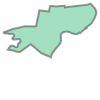

In [3]:
#extract geometry
uc_poly =uc.squeeze().geometry
uc_poly

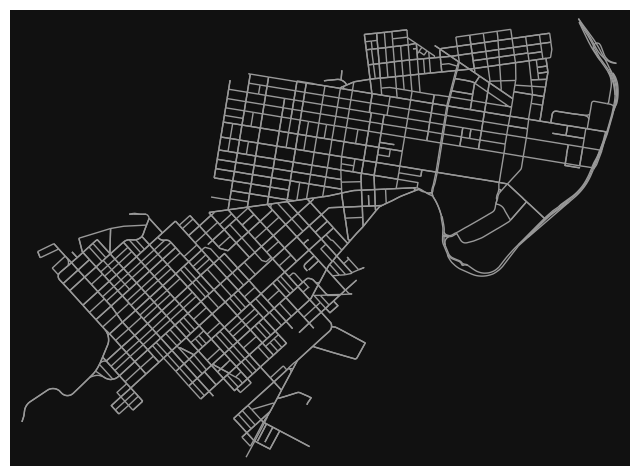

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
#get street network
import osmnx as ox
#define boundary and network type
G = ox.graph_from_polygon(uc_poly, network_type='drive')
#project and plot
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected,node_size=0)

In [5]:
#convert to dataframe
G_edges = ox.graph_to_gdfs(G, edges=True, nodes=False)
G_edges

osmid               name  \
u           v          key                                              
109729049   110395837  0                  12177237  South 53rd Street   
            110395805  0                  12177237  South 53rd Street   
109729056   109729049  0                  12109142    Hadfield Street   
            110036974  0                 858930075  South 54th Street   
            110036982  0                 858930075  South 54th Street   
...                                            ...                ...   
8821290948  4477512909 0    [1222161131, 12114109]  Schuylkill Avenue   
9748982164  110032722  0                  12152396       Gibson Drive   
11337193492 4777004955 0                  50033059   Lancaster Avenue   
            4777004946 0                  42706833  North 38th Street   
            4777004941 0                  50033059   Lancaster Avenue   

                                highway  oneway reversed   length  \
u           v          key                                          
109729049   110395837  0    residential   False    False   63.895   
            110395805  0    residential   False     True   61.947   
109729056   109729049  0    residential    True    False  158.613   
            110036974  0    residential   False    False   51.815   
            110036982  0    residential   False     True   61.925   
...                                 ...     ...      ...      ...   
8821290948  4477512909 0        primary    True    False  174.913   
9748982164  110032722  0    residential   False     True  176.831   
11337193492 4777004955 0        primary   False     True    5.873   
            4777004946 0        primary    True    False   42.392   
            4777004941 0        primary   False    False   85.892   

                                                                     geometry  \
u           v          key                                                      
109729049   110395837  0    LINESTRING (-75.22731 39.94551, -75.22698 39.9...   
            110395805  0    LINESTRING (-75.22731 39.94551, -75.22745 39.9...   
109729056   109729049  0    LINESTRING (-75.22868 39.94454, -75.22731 39.9...   
            110036974  0    LINESTRING (-75.22868 39.94454, -75.22909 39.9...   
            110036982  0    LINESTRING (-75.22868 39.94454, -75.22818 39.9...   
...                                                                       ...   
8821290948  4477512909 0    LINESTRING (-75.18256 39.95165, -75.18260 39.9...   
9748982164  110032722  0    LINESTRING (-75.21810 39.92933, -75.21796 39.9...   
11337193492 4777004955 0    LINESTRING (-75.19692 39.96029, -75.19686 39.9...   
            4777004946 0    LINESTRING (-75.19692 39.96029, -75.19692 39.9...   
            4777004941 0    LINESTRING (-75.19692 39.96029, -75.19704 39.9...   

                             lanes maxspeed bridge  ref tunnel access  
u           v          key                                             
109729049   110395837  0       NaN      NaN    NaN  NaN    NaN    NaN  
            110395805  0       NaN      NaN    NaN  NaN    NaN    NaN  
109729056   109729049  0       NaN      NaN    NaN  NaN    NaN    NaN  
            110036974  0       NaN      NaN    NaN  NaN    NaN    NaN  
            110036982  0       NaN      NaN    NaN  NaN    NaN    NaN  
...                            ...      ...    ...  ...    ...    ...  
8821290948  4477512909 0    [2, 1]      NaN    yes  NaN    NaN    NaN  
9748982164  110032722  0       NaN      NaN    NaN  NaN    NaN    NaN  
11337193492 4777004955 0         2   25 mph    NaN  NaN    NaN    NaN  
            4777004946 0         2   25 mph    NaN  NaN    NaN    NaN  
            4777004941 0         2   25 mph    NaN  NaN    NaN    NaN  

[2494 rows x 13 columns]

In [6]:
crash_2022=pd.read_csv('CRASH_PHILADELPHIA_2022.csv')

In [7]:
crash_gdf = gpd.GeoDataFrame(
    crash_2022,
    geometry=gpd.points_from_xy(crash_2022.DEC_LONG, crash_2022.DEC_LAT),
    crs="EPSG:4326")
crash_gdf

,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,...,WORKERS_PRES,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,WZ_WORKERS_INJ_KILLED,geometry
0,2022027568,1828.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.00310 40.04350)
1,2022026961,2125.0,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.15680 39.94360)
2,2022002986,1743.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.05010 40.01720)
3,2022002955,1543.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.14800 39.91870)
4,2022027261,819.0,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.21480 39.89620)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8746,2022016289,2245.0,3,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.14250 40.02390)
8747,2022037461,1706.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.16580 39.95830)
8748,2022014729,1721.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.04950 40.01890)
8749,2022014753,713.0,3,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.16870 39.92910)


In [8]:
# Get the boundary of the edges data frame
boundary = G_edges.geometry.unary_union.convex_hull
# Trim the crashes to the Center City district
crashes_within_uc = crash_gdf[crash_gdf.within(boundary)]
crashes_within_uc

C:\ProgramData\mambaforge\envs\musa-550-fall-2023\lib\site-packages\shapely\predicates.py:946: RuntimeWarning: invalid value encountered in within
  return lib.within(a, b, **kwargs)


,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,...,WORKERS_PRES,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,WZ_WORKERS_INJ_KILLED,geometry
14,2022026905,335.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.18120 39.96050)
73,2022026692,1407.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.18030 39.95670)
96,2023004276,2339.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.18240 39.96120)
110,2023003647,1121.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.22690 39.95050)
117,2023004287,1040.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.18030 39.95680)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,2022039362,113.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.18040 39.95890)
8640,2022015676,741.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.18210 39.96120)
8658,2022037292,2048.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.19860 39.95360)
8666,2022010123,707.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.18580 39.95510)


In [11]:
G_projected = ox.project_graph(G, to_crs="epsg:2272")
crashes_within_uc_projected = crashes_within_uc.to_crs(epsg=2272)

In [12]:
import numpy as np
# Find the nearest edge for each crash
nearest_edges = ox.distance.nearest_edges(G_projected, crashes_within_uc_projected.geometry.x, crashes_within_uc_projected.geometry.y)
nearest_edges

[(774451719, 109783891, 0),
 (344168746, 344169330, 0),
 (109916149, 7065599349, 0),
 (4775923913, 110424091, 0),
 (344168746, 344169330, 0),
 (109837334, 109837341, 0),
 (110171517, 110171525, 0),
 (109761669, 109785041, 0),
 (344169347, 1589901050, 0),
 (110049520, 110049528, 0),
 (344169347, 1589901050, 0),
 (109906697, 109906663, 0),
 (7065599349, 109915821, 0),
 (109761317, 109785041, 0),
 (109915821, 109761669, 0),
 (5562153451, 780931331, 0),
 (109761669, 109785041, 0),
 (774451719, 1589901050, 0),
 (774451719, 109783891, 0),
 (774451719, 109783891, 0),
 (774451719, 109783891, 0),
 (344169347, 1589901050, 0),
 (774091746, 109916149, 0),
 (7202429871, 7202429868, 0),
 (5372085247, 5372085246, 0),
 (774451719, 109783891, 0),
 (109785041, 6169097376, 0),
 (109813532, 109813544, 0),
 (109875390, 4777004932, 0),
 (109915821, 109761669, 0),
 (7737664918, 110032707, 0),
 (5562153451, 780931331, 0),
 (109866021, 109866011, 0),
 (109813532, 109813544, 0),
 (110037079, 110347750, 0),
 (10

In [13]:
#create dataframe
crash_df = pd.DataFrame(nearest_edges, columns=['u', 'v', 'key'])
#calculate count
crash_count = crash_df.groupby(['u', 'v']).size().reset_index(name='crash_count')
crash_count

,u,v,crash_count
0,109729084,109729072,1
1,109743610,110196921,5
2,109761317,109785041,6
3,109761628,109918290,3
4,109761669,109785041,5
...,...,...,...
308,5562153451,780931331,15
309,7065599349,109915821,10
310,7202429871,4476162811,3
311,7202429871,7202429868,2


In [14]:
#merge data
merged_crash = pd.merge(G_edges, crash_count, on=['u', 'v'], how='left')
# fill missing crash count values with zero
merged_crash['crash_count'].fillna(0, inplace=True)
merged_crash

,u,v,osmid,name,highway,oneway,reversed,length,geometry,lanes,maxspeed,bridge,ref,tunnel,access,crash_count
0,109729049,110395837,12177237,South 53rd Street,residential,False,False,63.895,"LINESTRING (-75.22731 39.94551, -75.22698 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,109729049,110395805,12177237,South 53rd Street,residential,False,True,61.947,"LINESTRING (-75.22731 39.94551, -75.22745 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,109729056,109729049,12109142,Hadfield Street,residential,True,False,158.613,"LINESTRING (-75.22868 39.94454, -75.22731 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,109729056,110036974,858930075,South 54th Street,residential,False,False,51.815,"LINESTRING (-75.22868 39.94454, -75.22909 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,109729056,110036982,858930075,South 54th Street,residential,False,True,61.925,"LINESTRING (-75.22868 39.94454, -75.22818 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,8821290948,4477512909,"[1222161131, 12114109]",Schuylkill Avenue,primary,True,False,174.913,"LINESTRING (-75.18256 39.95165, -75.18260 39.9...","[2, 1]",NaN,yes,NaN,NaN,NaN,0.0
2490,9748982164,110032722,12152396,Gibson Drive,residential,False,True,176.831,"LINESTRING (-75.21810 39.92933, -75.21796 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0
2491,11337193492,4777004955,50033059,Lancaster Avenue,primary,False,True,5.873,"LINESTRING (-75.19692 39.96029, -75.19686 39.9...",2,25 mph,NaN,NaN,NaN,NaN,0.0
2492,11337193492,4777004946,42706833,North 38th Street,primary,True,False,42.392,"LINESTRING (-75.19692 39.96029, -75.19692 39.9...",2,25 mph,NaN,NaN,NaN,NaN,0.0


In [15]:
#calculate crash count divided by street length
crash_idx = merged_crash['crash_count'] / merged_crash['length']
#log transform
crash_idx_filtered = crash_idx[crash_idx > 0]
log_crash_idx = np.log10(crash_idx_filtered)
#normalize index from 0 to 1
norm_crash_idx=(log_crash_idx - log_crash_idx.min()) / (log_crash_idx.max() - log_crash_idx.min())
norm_crash_idx

13      0.379480
24      0.245065
39      0.387163
40      0.308344
42      0.428270
          ...   
2456    0.467792
2470    0.343569
2473    0.524790
2474    0.430458
2479    0.326645
Length: 313, dtype: float64

In [16]:
merged_crash['norm_crash_idx'] = norm_crash_idx
merged_crash

,u,v,osmid,name,highway,oneway,reversed,length,geometry,lanes,maxspeed,bridge,ref,tunnel,access,crash_count,norm_crash_idx
0,109729049,110395837,12177237,South 53rd Street,residential,False,False,63.895,"LINESTRING (-75.22731 39.94551, -75.22698 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,109729049,110395805,12177237,South 53rd Street,residential,False,True,61.947,"LINESTRING (-75.22731 39.94551, -75.22745 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,109729056,109729049,12109142,Hadfield Street,residential,True,False,158.613,"LINESTRING (-75.22868 39.94454, -75.22731 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,109729056,110036974,858930075,South 54th Street,residential,False,False,51.815,"LINESTRING (-75.22868 39.94454, -75.22909 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,109729056,110036982,858930075,South 54th Street,residential,False,True,61.925,"LINESTRING (-75.22868 39.94454, -75.22818 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,8821290948,4477512909,"[1222161131, 12114109]",Schuylkill Avenue,primary,True,False,174.913,"LINESTRING (-75.18256 39.95165, -75.18260 39.9...","[2, 1]",NaN,yes,NaN,NaN,NaN,0.0,NaN
2490,9748982164,110032722,12152396,Gibson Drive,residential,False,True,176.831,"LINESTRING (-75.21810 39.92933, -75.21796 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2491,11337193492,4777004955,50033059,Lancaster Avenue,primary,False,True,5.873,"LINESTRING (-75.19692 39.96029, -75.19686 39.9...",2,25 mph,NaN,NaN,NaN,NaN,0.0,NaN
2492,11337193492,4777004946,42706833,North 38th Street,primary,True,False,42.392,"LINESTRING (-75.19692 39.96029, -75.19692 39.9...",2,25 mph,NaN,NaN,NaN,NaN,0.0,NaN


In [17]:
merged_crash.explore(column="norm_crash_idx", tiles="CartoDB positron")